# Light GBM

In [10]:
# Import the libraries you'll need
import shap
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
import matplotlib.pyplot as plt
import optuna
from optuna.integration import OptunaSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold

In [ ]:
# #公開ユーザー名はopen　パスワードはopen12345
# import getpass
# host="10.230.230.108"
# user="open"
# password=getpass.getpass("Enter your password:")
# database = "jerespire"
# port = "3306"

In [ ]:
# import pandas as pd
# import sqlalchemy as sa

# url = f'mysql+pymysql://{user}:{password}@{host}:{port}/{database}?charset=utf8'
# # url = f'mysql+pymysql://open:{getpass.getpass("Enter your password:")}@DESKTOP-6FKT5DC:3306/test?charset=utf8'
# engine = sa.create_engine(url, echo=False)

# query = "select * from result1_2" # テーブルを指定
# df = pd.read_sql(sql = query, con = engine)

# df.head()

OperationalError: (pymysql.err.OperationalError) (2003, "Can't connect to MySQL server on '10.230.230.108' (timed out)")
(Background on this error at: https://sqlalche.me/e/20/e3q8)

In [11]:
# df = pd.read_excel("E:/Je respire/解析/1. 脳血流と問題カテゴリの関連.xlsx", sheet_name="ディアビアイ")
# df = pd.read_excel("E:/Je respire/解析/1.2 脳血流と問題カテゴリの関連 - 背外側追加.xlsx", sheet_name="ディアビアイ")
df = pd.read_excel("./1.2 脳血流と問題カテゴリの関連 - 背外側追加.xlsx", sheet_name="ディアビアイ")

In [12]:
df = df.drop(columns=['subject', 'question', 'q_category', #前半部分
                   'dataset_no', 'sheet_name']) # 後半部分

In [13]:
# 脳血流のオキシヘモグロビンだけ使う場合
df = df.drop(columns=['CH1.1_std', 'CH2.1_std', 'CH3.1_std',
       'CH4.1_std', 'CH5.1_std', 'CH6.1_std', 'CH7.1_std', 'CH8.1_std',
       'CH9.1_std', 'CH10.1_std', 'CH11.1_std', 'CH12.1_std', 'CH13.1_std',
       'CH14.1_std', 'CH15.1_std', 'CH16.1_std', 'CH17.1_std', 'CH18.1_std',
       'CH19.1_std', 'CH20.1_std', 'CH21.1_std', 'CH22.1_std', 'CH1.2_std',
       'CH2.2_std', 'CH3.2_std', 'CH4.2_std', 'CH5.2_std', 'CH6.2_std',
       'CH7.2_std', 'CH8.2_std', 'CH9.2_std', 'CH10.2_std', 'CH11.2_std',
       'CH12.2_std', 'CH13.2_std', 'CH14.2_std', 'CH15.2_std', 'CH16.2_std',
       'CH17.2_std', 'CH18.2_std', 'CH19.2_std', 'CH20.2_std', 'CH21.2_std',
       'CH22.2_std' ]) # 後半部分


In [14]:
df['score'] = df['score'].replace(2, 1)

In [15]:
df.columns

Index(['score', 'left_pupil_std', 'right_pupil_std', 'CH1_std', 'CH2_std',
       'CH3_std', 'CH4_std', 'CH5_std', 'CH6_std', 'CH7_std', 'CH8_std',
       'CH9_std', 'right_haigai', 'CH10_std', 'CH11_std', 'CH12_std',
       'CH13_std', 'hainai', 'CH14_std', 'CH15_std', 'CH16_std', 'CH17_std',
       'CH18_std', 'left_haigai', 'CH19_std', 'CH20_std', 'CH21_std',
       'CH22_std', 'Sensor-E:SC/GSR_std', 'Sensor-G:BVP_std',
       '[G] BVP Amp._std', '[G] Heart Rate_std', '[G] HRV Amp._std',
       '[G] HRV-LF Power (0,04-0,16 Hz)_std',
       '[G] HRV-HF Power (0,16-0,4 Hz)_std', '[G] HRV-LF / HRV-HF _std'],
      dtype='object')

In [16]:
df.columns = [col.replace(':', '_')
                .replace('/', '_')
                .replace('[', '')
                .replace(']', '')
                .replace(' ', '_')
                .replace('.', '_')
                .replace(',', '_')
                .replace('(', '_')
                .replace(')', '_')
                for col in df.columns]

In [17]:
X = df.drop(columns=['score'])
y = df['score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

model = lgb.LGBMClassifier(random_state=42, objective='binary', is_unbalance=True)
model.fit(X_train, y_train)



[LightGBM] [Info] Number of positive: 129, number of negative: 63
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000279 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2189
[LightGBM] [Info] Number of data points in the train set: 192, number of used features: 35
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.671875 -> initscore=0.716678
[LightGBM] [Info] Start training from score 0.716678
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

,boosting_type,'gbdt'
,num_leaves,31
,max_depth,-1
,learning_rate,0.1
,n_estimators,100
,subsample_for_bin,200000
,objective,'binary'
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


In [18]:
# param_dist = {
#     'n_estimators': optuna.distributions.FloatDistribution(50, 500),
#     'max_depth': optuna.distributions.FloatDistribution(2, 50),
#     'min_samples_split': optuna.distributions.FloatDistribution(2, 5),
#     'min_samples_leaf': optuna.distributions.FloatDistribution(2, 10),
#     'max_features': ['sqrt', 'log2']
# }

# Define hyperparameter search space
param_dist = {
    "num_leaves": optuna.distributions.IntDistribution(10, 200),
    "max_depth": optuna.distributions.IntDistribution(1, 30),
    "learning_rate": optuna.distributions.FloatDistribution(1e-4, 0.5, log=True),
    "n_estimators": optuna.distributions.IntDistribution(10, 500),
    "subsample": optuna.distributions.FloatDistribution(0.1, 1.0),
    "colsample_bytree": optuna.distributions.FloatDistribution(0.1, 1.0)
}

cv = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)

optuna_search = OptunaSearchCV(
    model,
    param_dist,
    cv=cv, # 交差検証の設定
    n_trials=1000, # トライアル回数
    scoring='accuracy', # 評価指標
    n_jobs=-1 # 計算するコアの数
)

C:\Users\thisi\AppData\Local\Temp\ipykernel_44108\928442420.py:21: ExperimentalWarning: OptunaSearchCV is experimental (supported from v0.17.0). The interface can change in the future.
  optuna_search = OptunaSearchCV(


In [19]:
optuna_search.fit(X_train, y_train) # モデルの学習
y_pred = optuna_search.predict(X_test) # テストデータに対する予測

[I 2025-10-30 18:12:36,231] A new study created in memory with name: no-name-c6343b0b-1ec1-461d-a30b-f3cf33078da1
[I 2025-10-30 18:12:36,476] Trial 0 finished with value: 0.671875 and parameters: {'num_leaves': 165, 'max_depth': 12, 'learning_rate': 0.000272124838083261, 'n_estimators': 20, 'subsample': 0.7303343587021406, 'colsample_bytree': 0.23150751554936713}. Best is trial 0 with value: 0.671875.
[I 2025-10-30 18:12:36,570] Trial 13 finished with value: 0.671875 and parameters: {'num_leaves': 41, 'max_depth': 18, 'learning_rate': 0.0027560056858247314, 'n_estimators': 19, 'subsample': 0.6900884135898678, 'colsample_bytree': 0.21730825572536772}. Best is trial 0 with value: 0.671875.
[I 2025-10-30 18:12:36,648] Trial 6 finished with value: 0.609375 and parameters: {'num_leaves': 96, 'max_depth': 23, 'learning_rate': 0.019423643940353088, 'n_estimators': 49, 'subsample': 0.6380251700163856, 'colsample_bytree': 0.7634541138021451}. Best is trial 0 with value: 0.671875.
[I 2025-10-30 

[LightGBM] [Info] Number of positive: 129, number of negative: 63
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000199 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2189
[LightGBM] [Info] Number of data points in the train set: 192, number of used features: 35
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.671875 -> initscore=0.716678
[LightGBM] [Info] Start training from score 0.716678
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

In [20]:
print("Best parameters: ", optuna_search.best_params_) # 最良のパラメータの表示
print("Test set accuracy: ", accuracy_score(y_test, y_pred)) # テストデータに対する予測精度の表示
print(accuracy_score(y_train, optuna_search.predict(X_train))) # 学習データに対する予測精度の表示

Best parameters:  {'num_leaves': 165, 'max_depth': 12, 'learning_rate': 0.000272124838083261, 'n_estimators': 20, 'subsample': 0.7303343587021406, 'colsample_bytree': 0.23150751554936713}
Test set accuracy:  0.6666666666666666
0.671875


In [21]:
explainer = shap.TreeExplainer(model=model)
shap_values = explainer.shap_values(X)
explanation = explainer(X)

c:\WorkSpace\共同研究\matsushima\Lib\site-packages\shap\explainers\_tree.py:586: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn(


In [22]:
print(explainer)
print(shap_values)
print(explanation)

[[ 0.14796689  0.29121686 -0.01151048 ...  0.06015835 -0.06841638
  -0.055005  ]
 [ 0.13077265  0.16049948 -0.03291711 ...  0.01033885 -0.11418016
  -0.06075563]
 [-0.4141999  -0.68335717 -0.03285103 ... -0.01329462 -0.09471894
  -0.08050291]
 ...
 [-0.63092483 -0.78036827 -0.01067693 ... -0.06771608 -0.01060534
  -0.20449813]
 [-0.84567734 -0.4261354  -0.04222006 ...  0.34619175  0.08167066
  -0.15141349]
 [-0.5536784  -0.16655262 -0.01604998 ...  0.53807726 -0.09763364
  -0.14984804]]
.values =
array([[ 0.14796689,  0.29121686, -0.01151048, ...,  0.06015835,
        -0.06841638, -0.055005  ],
       [ 0.13077265,  0.16049948, -0.03291711, ...,  0.01033885,
        -0.11418016, -0.06075563],
       [-0.4141999 , -0.68335717, -0.03285103, ..., -0.01329462,
        -0.09471894, -0.08050291],
       ...,
       [-0.63092483, -0.78036827, -0.01067693, ..., -0.06771608,
        -0.01060534, -0.20449813],
       [-0.84567734, -0.4261354 , -0.04222006, ...,  0.34619175,
         0.08167066, 

In [23]:
shap_values.shape

(240, 35)

In [25]:
shap_values[:, :]


array([[ 0.14796689,  0.29121686, -0.01151048, ...,  0.06015835,
        -0.06841638, -0.055005  ],
       [ 0.13077265,  0.16049948, -0.03291711, ...,  0.01033885,
        -0.11418016, -0.06075563],
       [-0.4141999 , -0.68335717, -0.03285103, ..., -0.01329462,
        -0.09471894, -0.08050291],
       ...,
       [-0.63092483, -0.78036827, -0.01067693, ..., -0.06771608,
        -0.01060534, -0.20449813],
       [-0.84567734, -0.4261354 , -0.04222006, ...,  0.34619175,
         0.08167066, -0.15141349],
       [-0.5536784 , -0.16655262, -0.01604998, ...,  0.53807726,
        -0.09763364, -0.14984804]], shape=(240, 35))

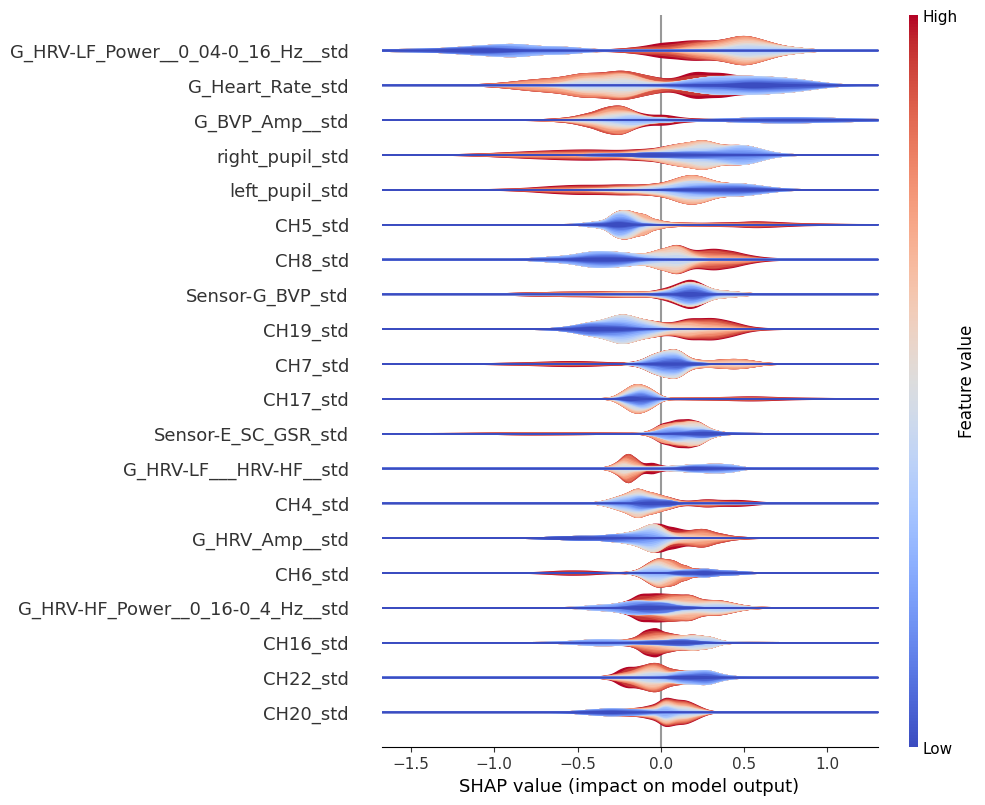

In [29]:
feat_names = list(X.columns)
shap.plots.violin(shap_values[:,:], features=X, feature_names=feat_names, plot_type="layered_violin")

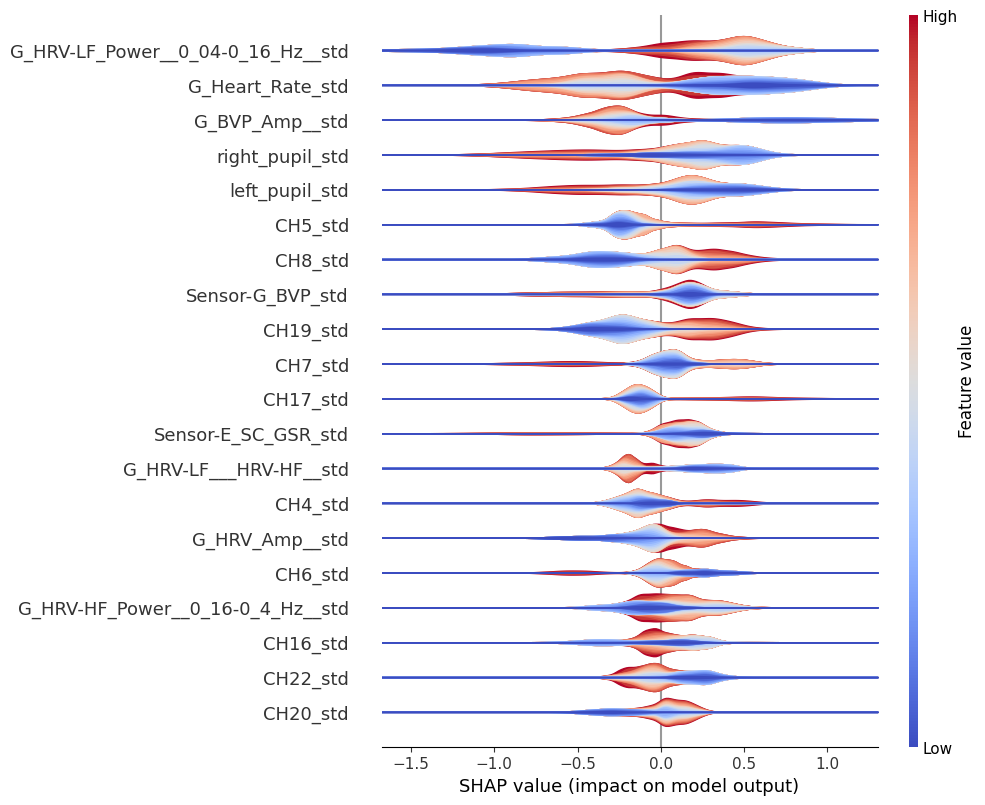

In [31]:
feat_names = list(X.columns)
shap.plots.violin(shap_values[:,:], features=X, feature_names=feat_names, plot_type="layered_violin")

In [32]:
print(X.columns)

Index(['left_pupil_std', 'right_pupil_std', 'CH1_std', 'CH2_std', 'CH3_std',
       'CH4_std', 'CH5_std', 'CH6_std', 'CH7_std', 'CH8_std', 'CH9_std',
       'right_haigai', 'CH10_std', 'CH11_std', 'CH12_std', 'CH13_std',
       'hainai', 'CH14_std', 'CH15_std', 'CH16_std', 'CH17_std', 'CH18_std',
       'left_haigai', 'CH19_std', 'CH20_std', 'CH21_std', 'CH22_std',
       'Sensor-E_SC_GSR_std', 'Sensor-G_BVP_std', 'G_BVP_Amp__std',
       'G_Heart_Rate_std', 'G_HRV_Amp__std',
       'G_HRV-LF_Power__0_04-0_16_Hz__std', 'G_HRV-HF_Power__0_16-0_4_Hz__std',
       'G_HRV-LF___HRV-HF__std'],
      dtype='object')


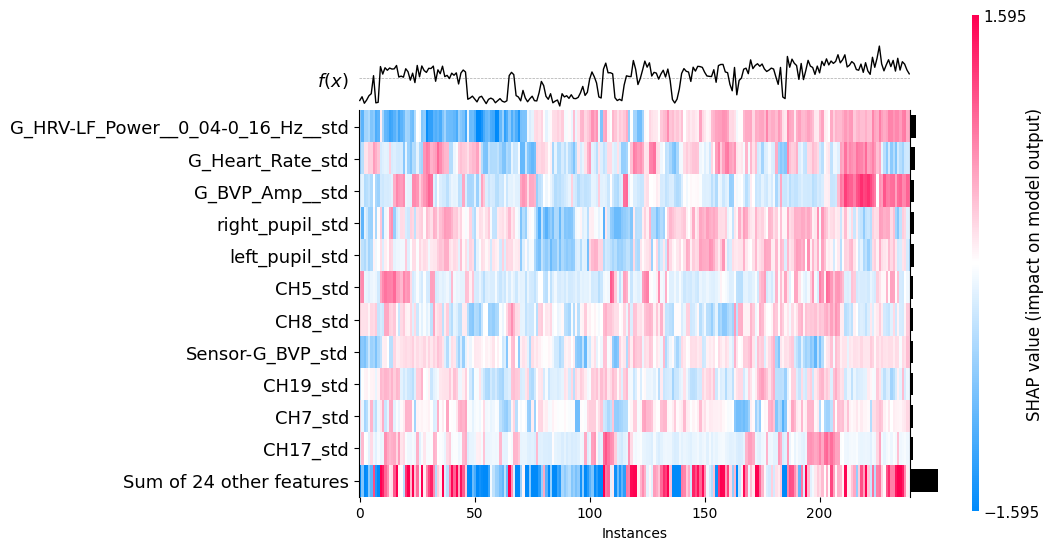

<Axes: xlabel='Instances'>

In [35]:
shap.plots.heatmap(explanation[:, :], max_display=12)

Index(['left_pupil_std', 'right_pupil_std', 'CH1_std', 'CH2_std', 'CH3_std',
       'CH4_std', 'CH5_std', 'CH6_std', 'CH7_std', 'CH8_std', 'CH9_std',
       'right_haigai', 'CH10_std', 'CH11_std', 'CH12_std', 'CH13_std',
       'hainai', 'CH14_std', 'CH15_std', 'CH16_std', 'CH17_std', 'CH18_std',
       'left_haigai', 'CH19_std', 'CH20_std', 'CH21_std', 'CH22_std',
       'Sensor-E_SC_GSR_std', 'Sensor-G_BVP_std', 'G_BVP_Amp__std',
       'G_Heart_Rate_std', 'G_HRV_Amp__std',
       'G_HRV-LF_Power__0_04-0_16_Hz__std', 'G_HRV-HF_Power__0_16-0_4_Hz__std',
       'G_HRV-LF___HRV-HF__std'],
      dtype='object')


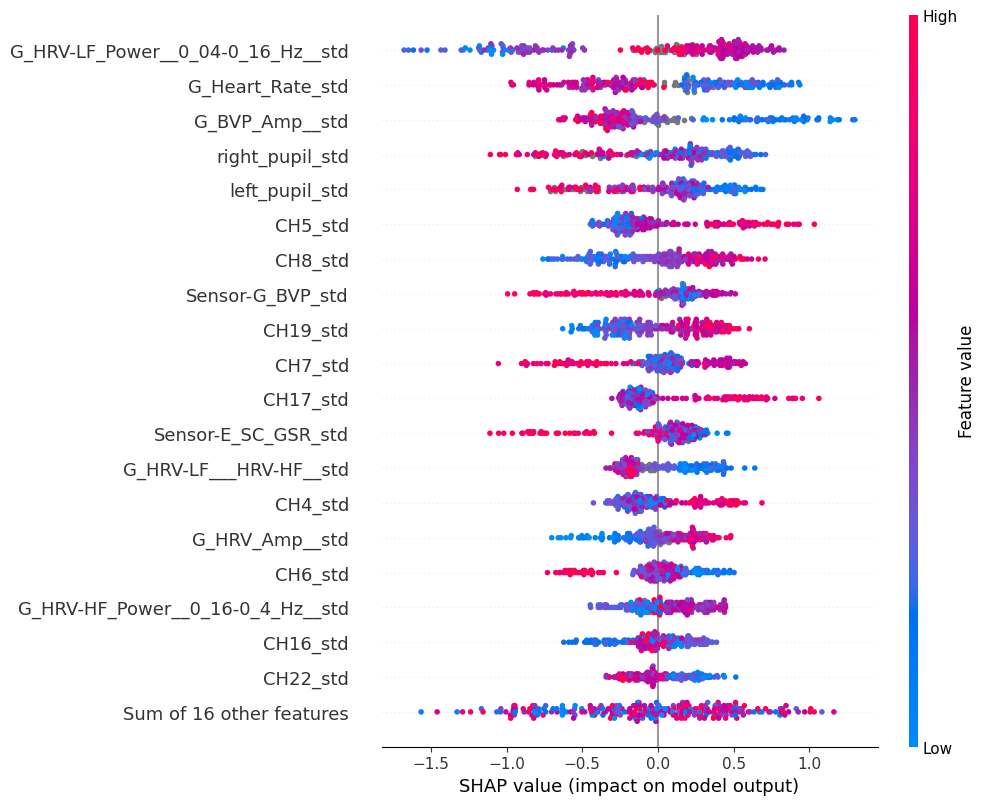

In [36]:
print(X.columns)
shap.plots.beeswarm(explanation[:, :], max_display=20)

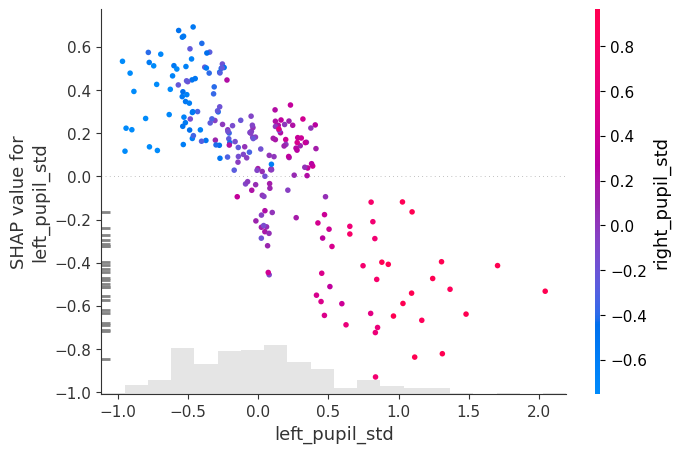

In [51]:
shap.plots.scatter(explanation[:, "left_pupil_std"], color=explanation[:, "right_pupil_std"])
# shap.plots.scatter(explanation[:, "CH5_std"], color=explanation[:, "CH1_std"])

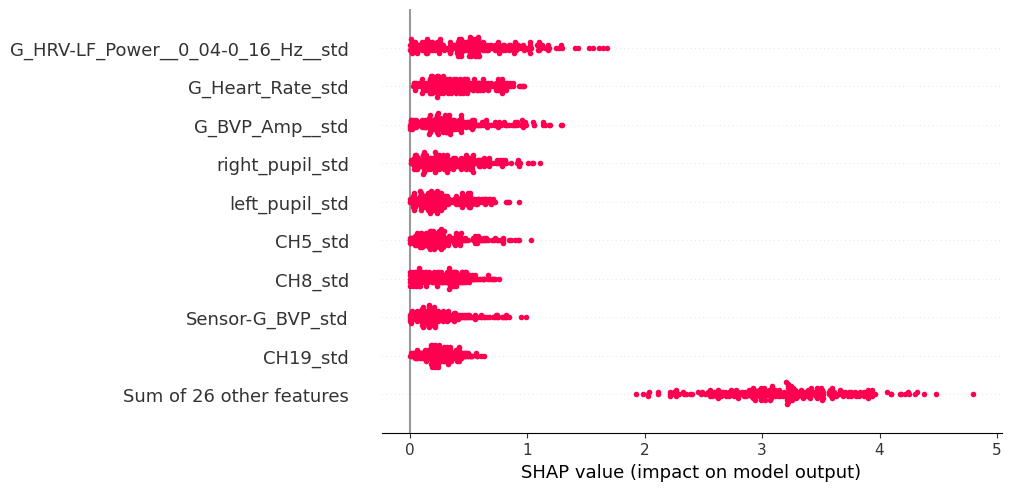

In [52]:
shap.plots.beeswarm(explanation[:, :].abs, color="shap_red")

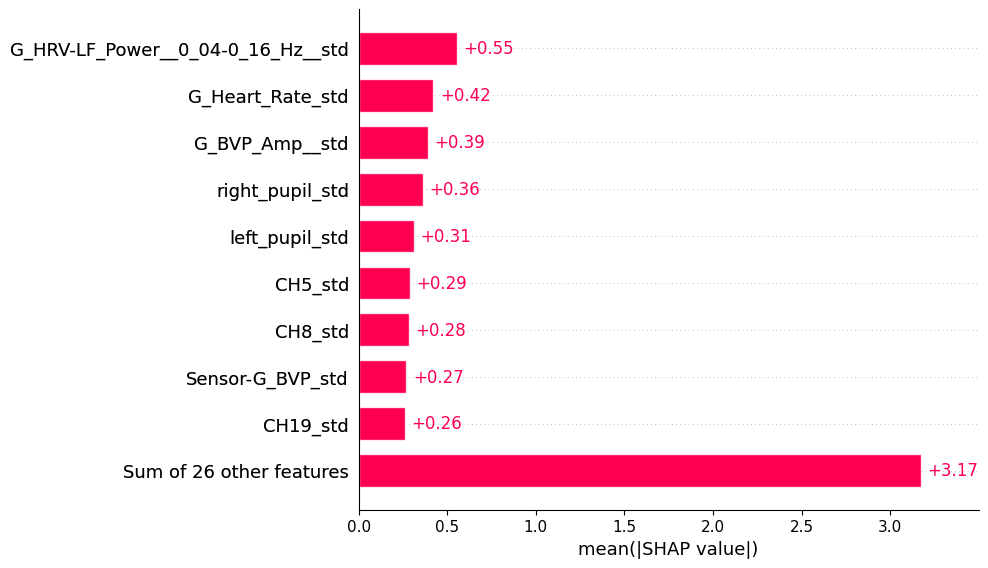

In [40]:
shap.plots.bar(explanation[:, :].abs.mean(0))

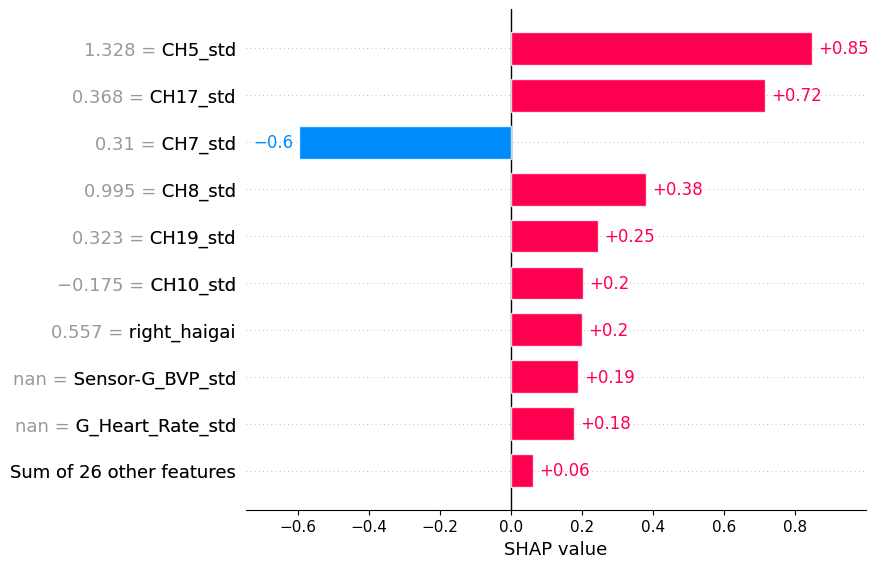

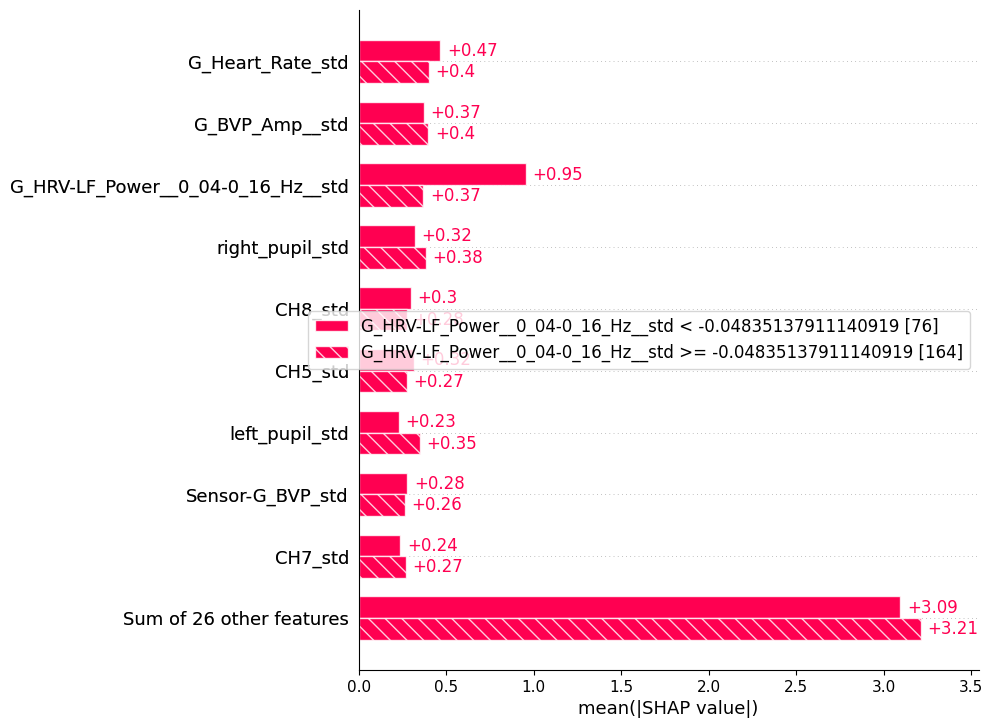

In [42]:
shap.plots.bar(explanation[1, :])
shap.plots.bar(explanation[:, :].cohorts(2).abs.mean(0))

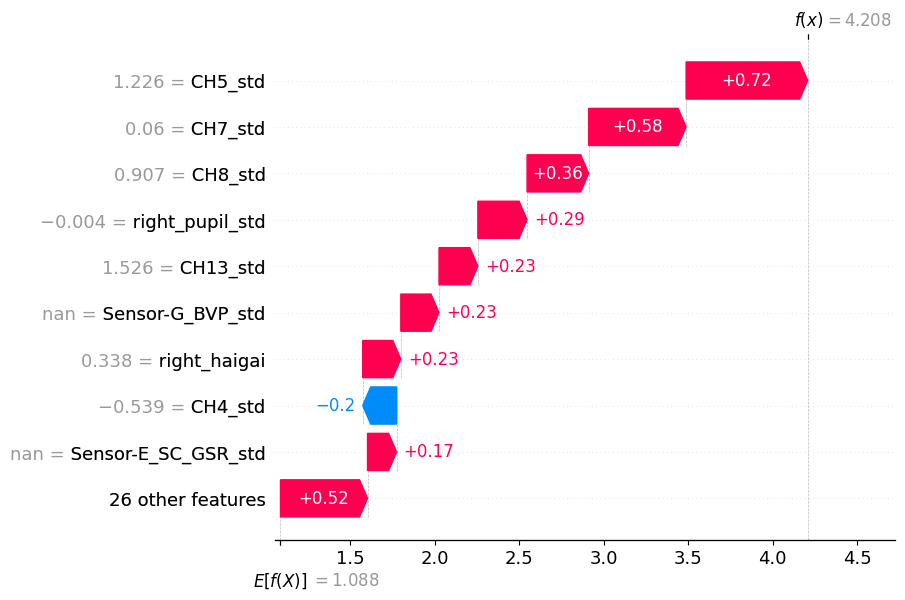

In [49]:
shap.plots.waterfall(explanation[0, :])

In [50]:
import json
import yaml
import pandas as pd
import numpy as np
from joblib import dump

from datetime import datetime

# 現在時刻を取得して、フォーマット
now = datetime.now()
timestamp = now.strftime('%Y%m%d_%H%M%S')



# 4. 保存処理
dump(model, f'C:/WorkSpace/共同研究/松島さん/Je respire ノーパソ/結果保存/model{timestamp}.joblib')  # モデル
with open(f'C:/WorkSpace/共同研究/松島さん/Je respire ノーパソ/結果保存/params{timestamp}.yaml', 'w') as f:
    yaml.dump(optuna_search.best_params_, f)     # ハイパーパラメータ
with open(f'C:/WorkSpace/共同研究/松島さん/Je respire ノーパソ/結果保存/metrics{timestamp}.json', 'w') as f:
    json.dump(accuracy_score(y_test, y_pred), f)    # 精度
pd.DataFrame(shap_values[1]).to_csv(f'C:/WorkSpace/共同研究/松島さん/Je respire ノーパソ/結果保存/shap_values{timestamp}.csv', index=False)  # SHAP値（クラス1）

# 5. オプション：SHAP explainerも保存
dump(explainer, f'C:/WorkSpace/共同研究/松島さん/Je respire ノーパソ/結果保存/shap_explainer{timestamp}.joblib')


['C:/WorkSpace/共同研究/松島さん/Je respire ノーパソ/結果保存/shap_explainer20251030_181720.joblib']